## All data in it related to diabetes including 9 columns and the output feature is an outcome that tells 0 and 1 that person has diabetes or not.

In [111]:
# importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [68]:
# load the data set.
df = pd.read_csv("C:\\Users\\pavan\\OneDrive\\Documents\\Diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
df.shape

(768, 9)

In [72]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Exploratory Data Analysis

In [168]:
# check the count of distinct values in each column.
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [74]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there are no missing values in this dataset.

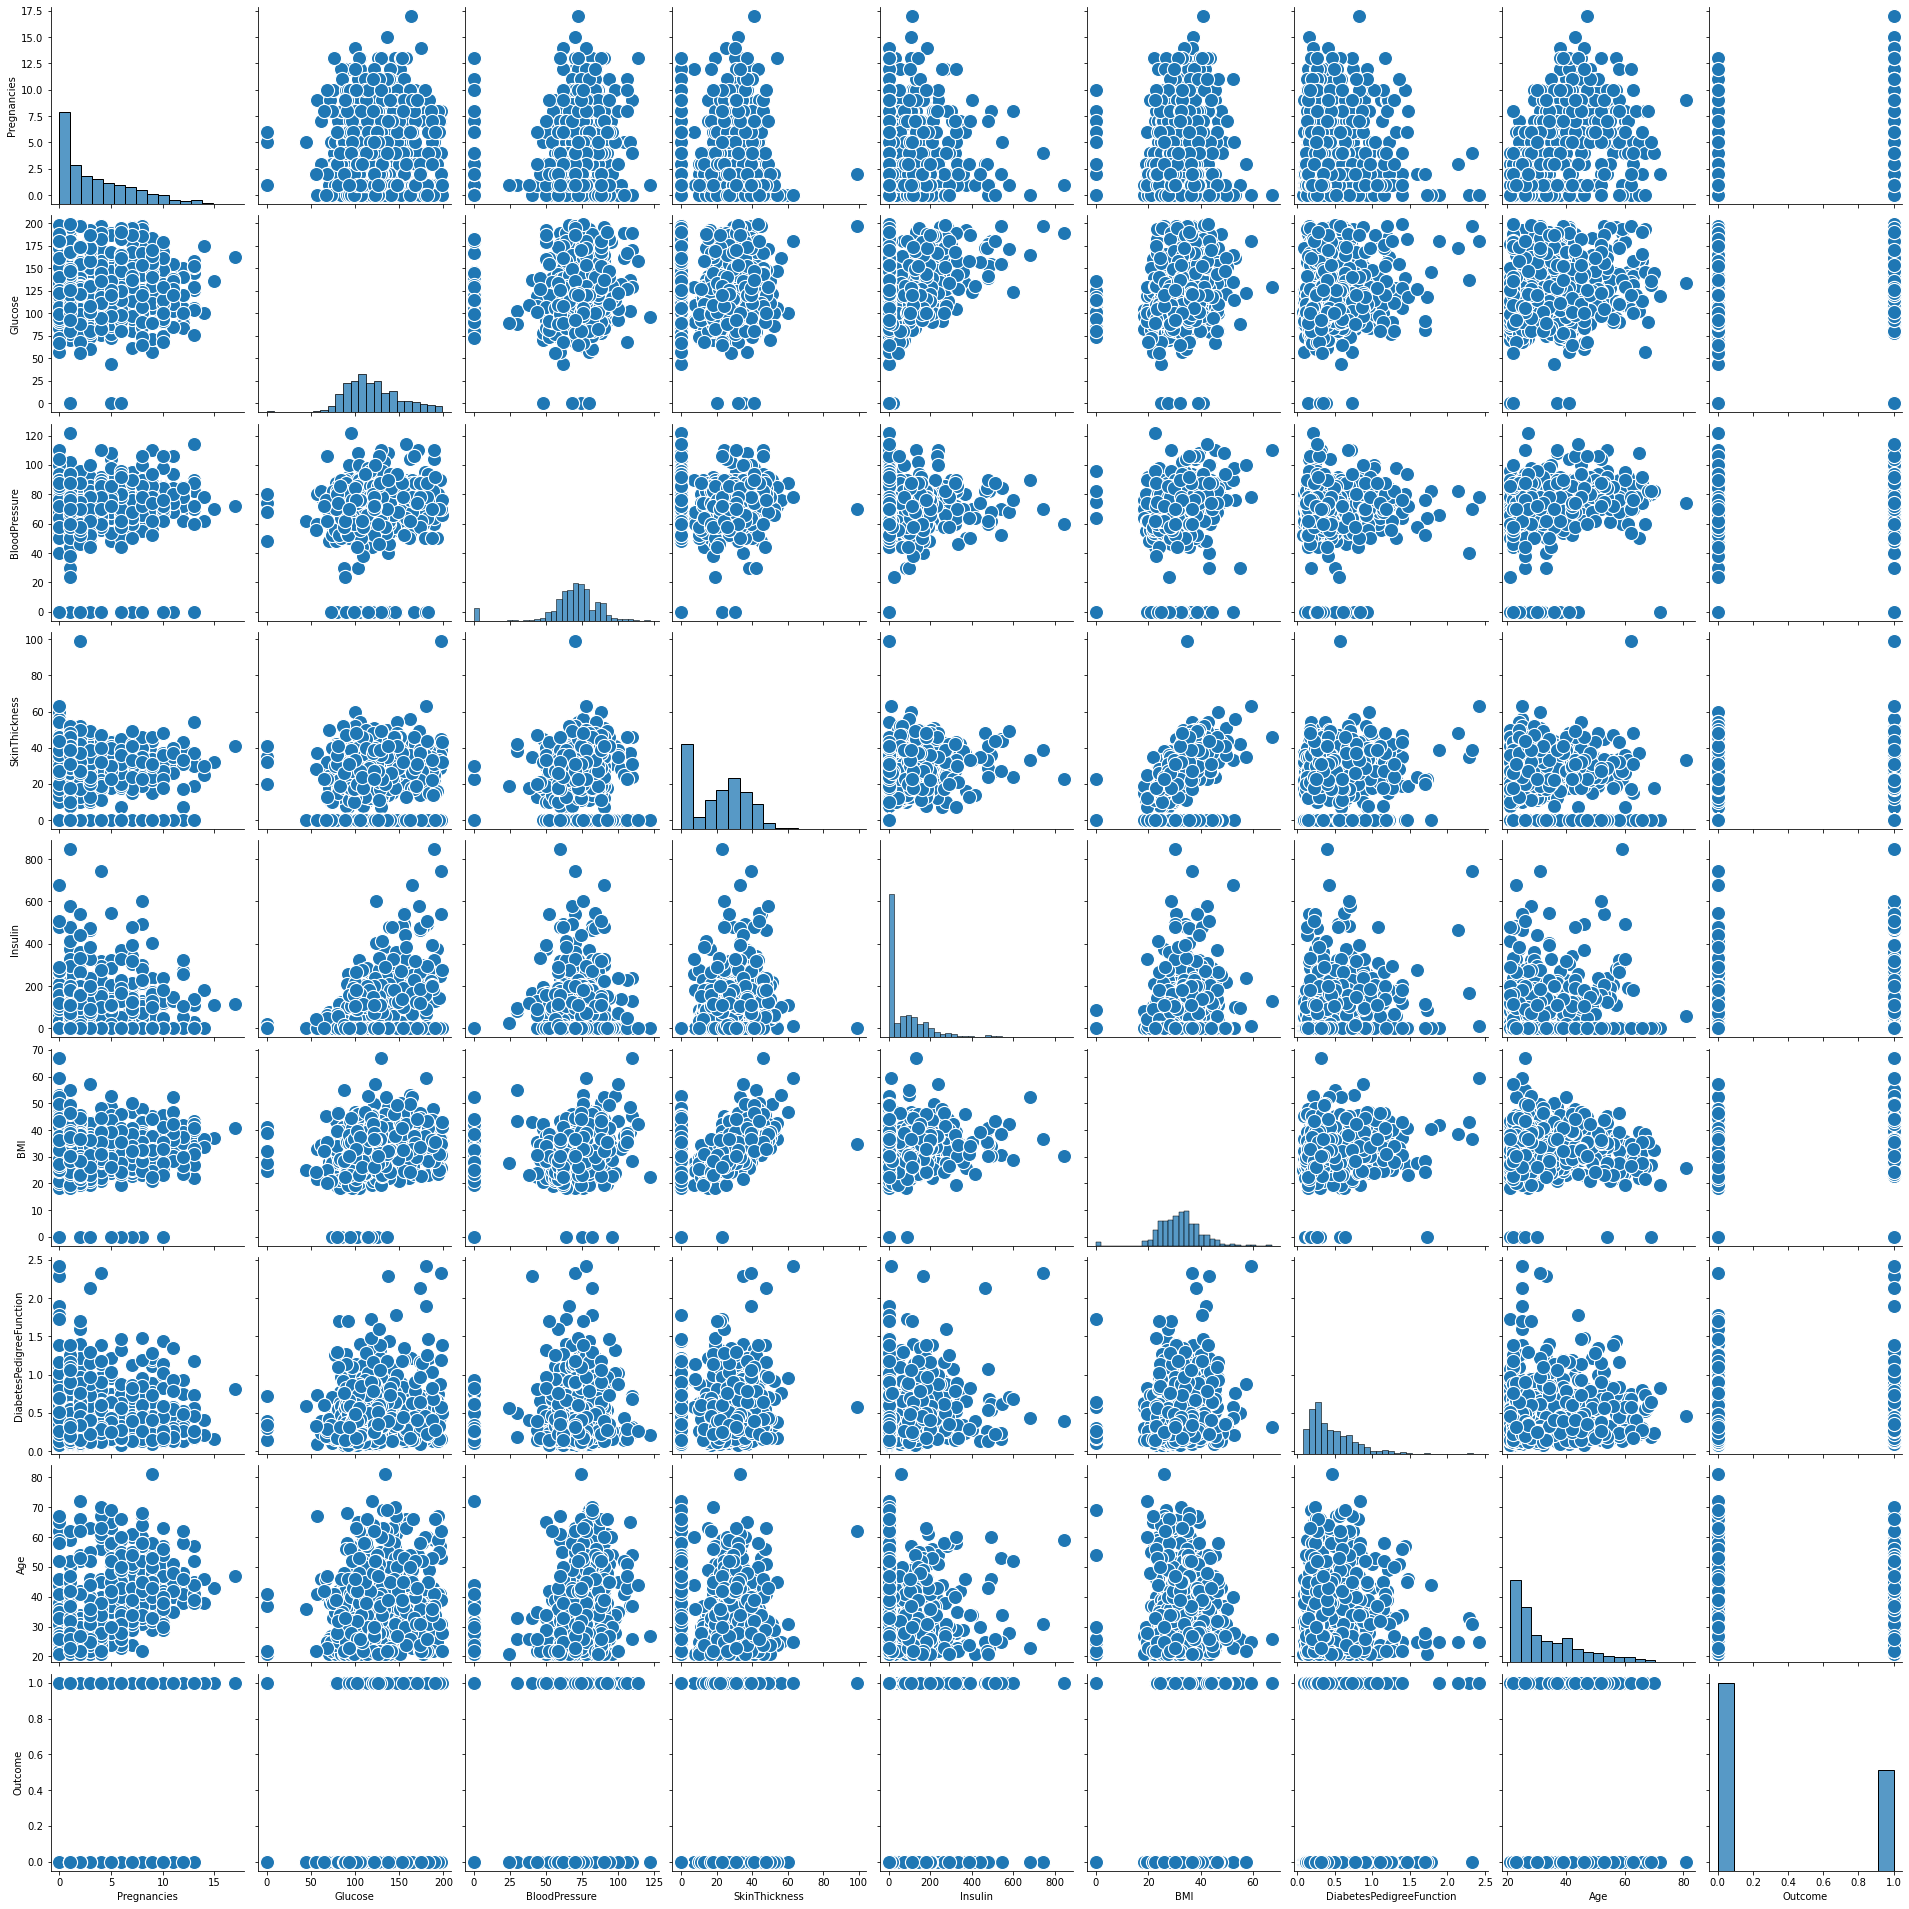

In [75]:
# pairplot is plotted for all features.
sns.pairplot(df,height=3, plot_kws={'s': 200})

## Pair plot

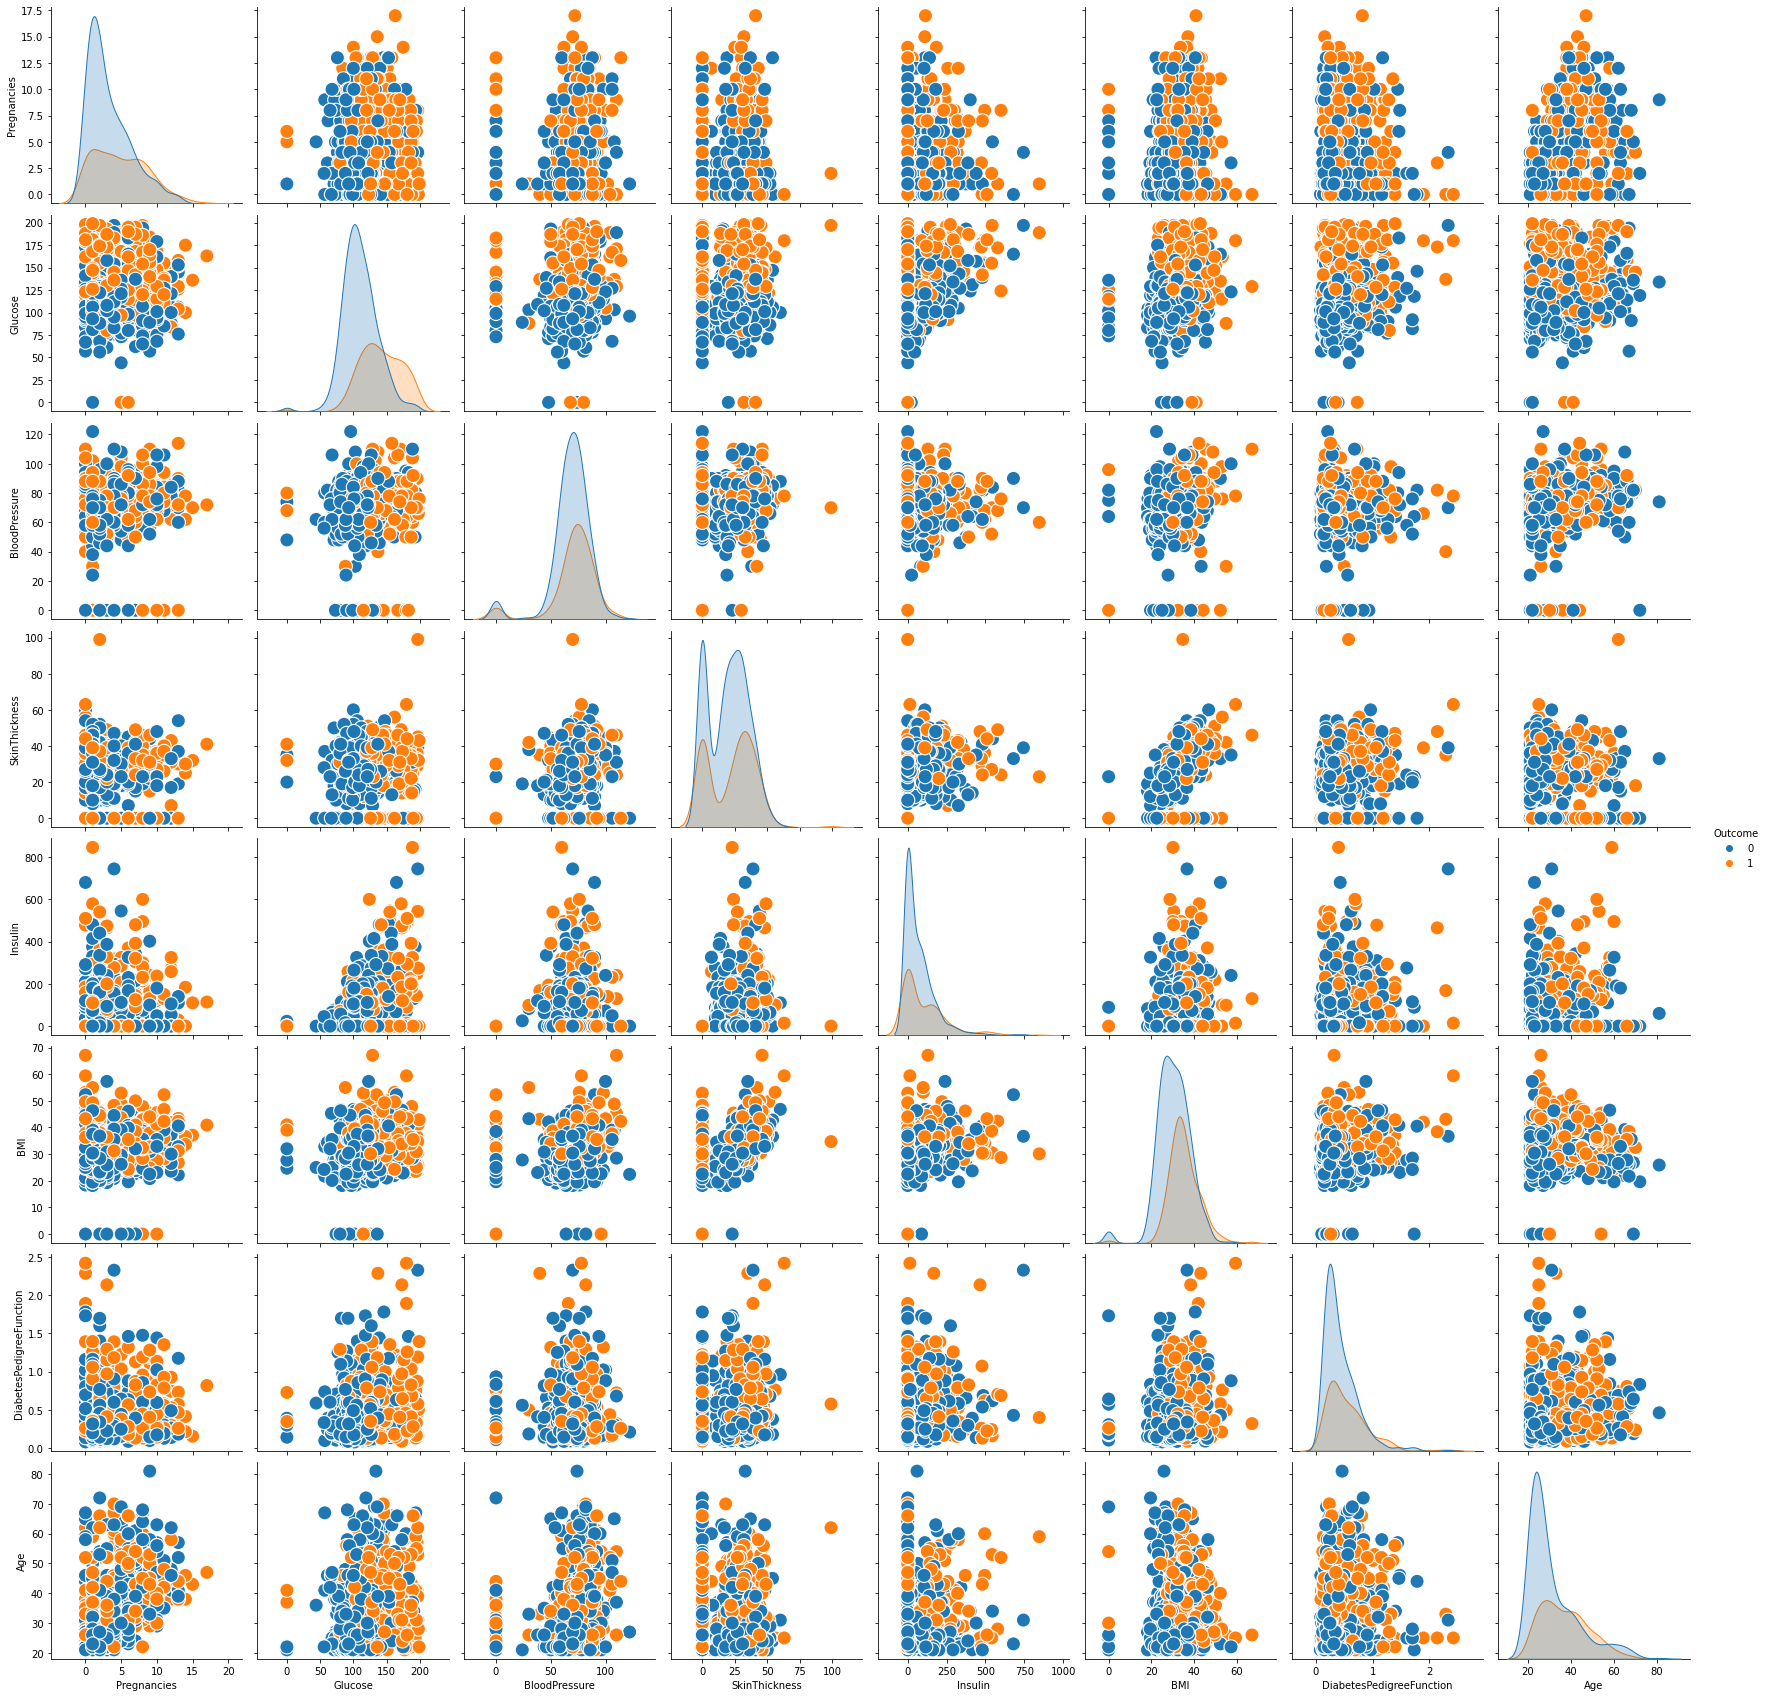

In [76]:
sns.pairplot(df,height=3, plot_kws={'s': 200},hue='Outcome')

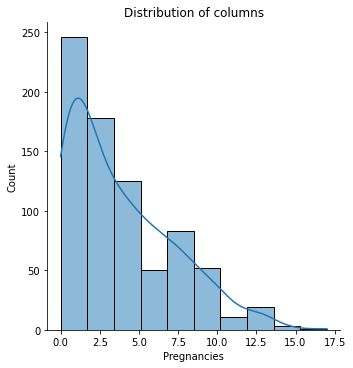

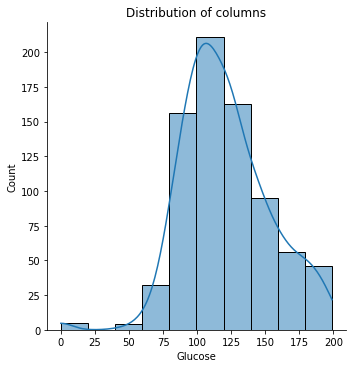

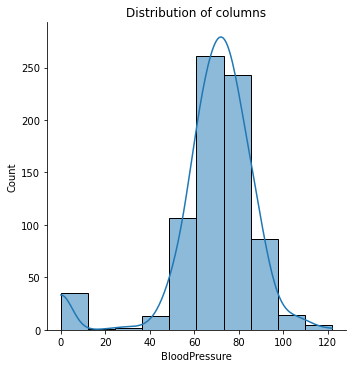

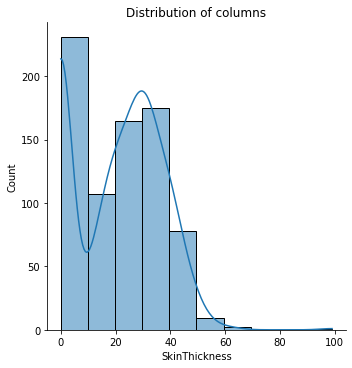

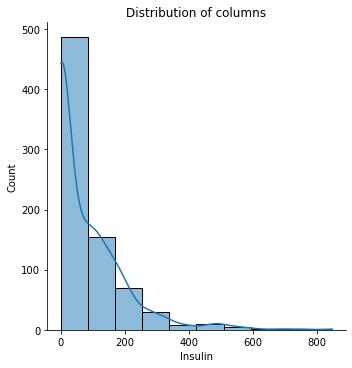

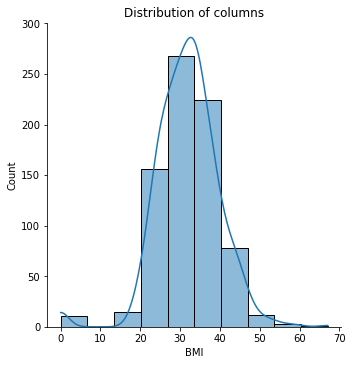

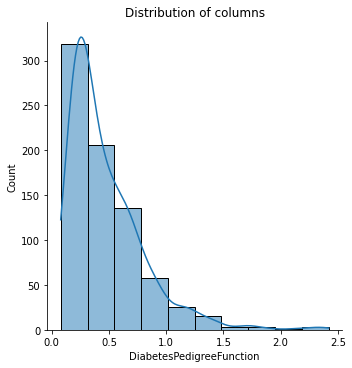

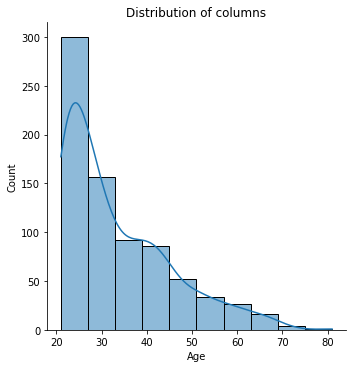

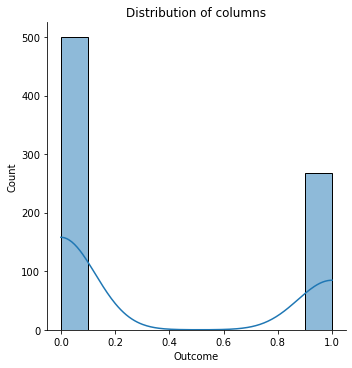

In [81]:
for column in df.columns:
    sns.displot(df[column], kde=True, bins=10)
    plt.title('Distribution of columns')
    plt.show()


## Box plot

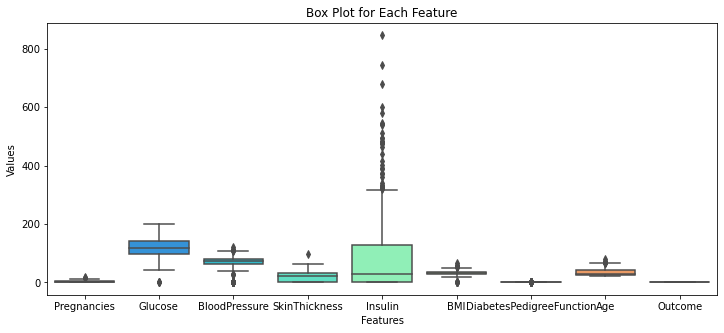

In [82]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, orient="v", palette="rainbow") 
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Box Plot for Each Feature")
plt.show()

## Correlation 

In [83]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

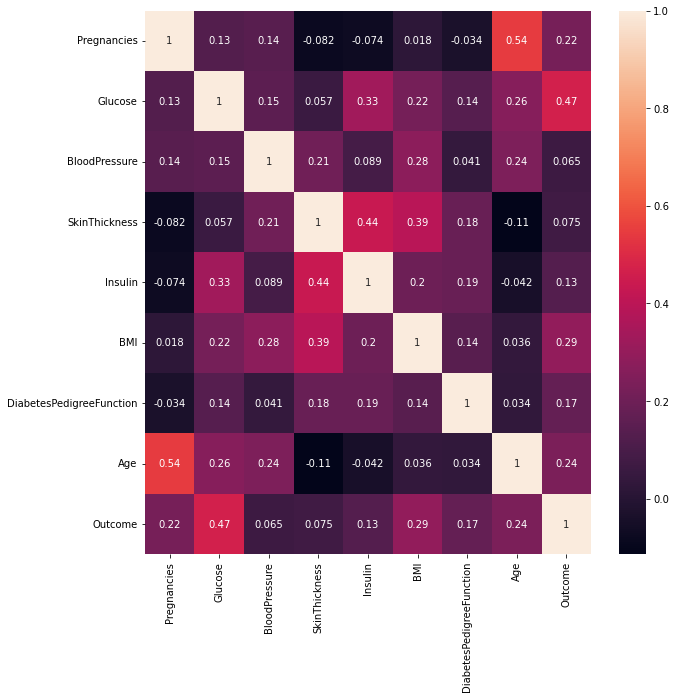

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

## Train Test Split

In [85]:
X = df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [86]:
y = df['Outcome']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state=0)

In [169]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [87]:
X_train.shape

(614, 8)

In [88]:
X_test.shape

(154, 8)

## Standardization of both training and test data.

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#Transform the training data. 
X_train_scaled = scaler.transform(X_train)
#Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

here both the training and testing datasetsare transformed using the same scaler to ensure consistent scaling.

## Logistic Regression

In [133]:
# Initialize the logistic regression model
model_1 = LogisticRegression()

# Train the model using the training data
model_1.fit(X_train_scaled, y_train)

LogisticRegression()

In [167]:
# Predict on the test data
predictions = model_1.predict(X_test_scaled)
#Calculate accuracy
accuracy = round(accuracy_score(y_test, predictions)*100,2)
print("accuracy of logistic regression is {}".format(accuracy))

accuracy of logistic regression is 82.47


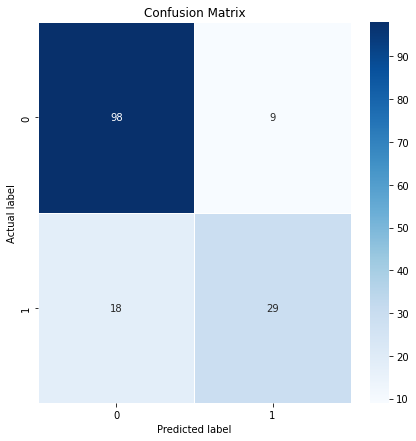

array([[98,  9],
       [18, 29]], dtype=int64)

In [135]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(7,7))
sns.heatmap(data=conf_matrix,linewidths=.6,annot=True,cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title('Confusion Matrix')
plt.show()
conf_matrix

In [166]:
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("f1 score is {}".format(f1))
print("precision score is {}".format(precision))
print("recall score is {}".format(recall))

f1 score is 0.6823529411764706
precision score is 0.7631578947368421
recall score is 0.6170212765957447


## Decision Tree Classifier

In [136]:
# Initialize and train the Decision Tree Classifier
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [137]:
pred = model_2.predict(X_test_scaled)
Accuracy = round(accuracy_score(y_test, pred)*100,2)
Accuracy

77.27

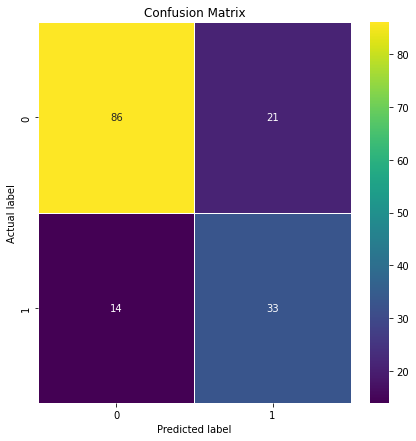

array([[86, 21],
       [14, 33]], dtype=int64)

In [138]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.6,annot=True,cmap='viridis')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title('Confusion Matrix')
plt.show()
cm

In [165]:
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print("f1 score is {}".format(f1))
print("precision score is {}".format(precision))
print("recall score is {}".format(recall))

f1 score is 0.6534653465346535
precision score is 0.6111111111111112
recall score is 0.7021276595744681


## Random Forest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [159]:
pred_rfc = model.predict(X_test_scaled)
# Model Evaluation
accuracy_rfc = accuracy_score(y_test, pred_rfc)
accuracy_rfc_percentage = round((accuracy_rfc*100),2)
print("Accuracy is {} for Random forest Classifier".format(accuracy_rfc_percentage))

Accuracy is 83.12 for Random forest Classifier.


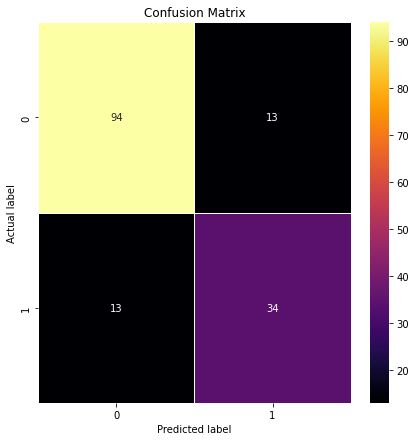

array([[94, 13],
       [13, 34]], dtype=int64)

In [163]:
# Generate a confusion matrix
cm_rfc = confusion_matrix(y_test, pred_rfc)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm_rfc,linewidths=.6,annot=True,cmap='inferno')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title('Confusion Matrix')
plt.show()
cm_rfc

In [164]:
f1_rfc = f1_score(y_test, pred_rfc)
precision_rfc = precision_score(y_test, pred_rfc)
recall_rfc = recall_score(y_test, pred_rfc)
print("f1 score is {}".format(f1_rfc))
print("precision score is {}".format(precision_rfc))
print("recall score is {}".format(recall_rfc))

f1 score is 0.723404255319149
precision score is 0.723404255319149
recall score is 0.723404255319149
